In [9]:
import os
import pickle
import importlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from skimage import exposure
from keras.models import Model
from keras.models import load_model
from keras.utils import to_categorical
os.chdir('C:/Users/Pierre Lavigne/Dropbox/Etude de Cas M2/Scripts') #Select your working directory
cwd = os.getcwd()
F=importlib.import_module("Functions")
Functions=importlib.reload(F)

In [15]:
(X_train, train_label) = F.load_pickled_data("C:/Users/Pierre Lavigne/Desktop/data/train.p", ['features', 'labels'])
(X_test, test_label) = F.load_pickled_data("C:/Users/Pierre Lavigne/Desktop/data/test.p", ['features', 'labels'])
x_train = X_train/255.
x_test = X_test/255.

In [16]:
from skimage.util import random_noise
x_test_noisy = np.array([random_noise(x, mode='pepper', seed=None, clip=True) for x in x_test])
x_test=F.preprocess_dataset_new(x_test)
x_test_noisy=F.preprocess_dataset_new(x_test_noisy)

x_train_noisy = np.array([random_noise(x, mode='pepper', seed=None, clip=True) for x in x_train])
x_train=F.preprocess_dataset_new(x_train)
x_train_noisy=F.preprocess_dataset_new(x_train_noisy)

x_test = np.append(x_test,x_test_noisy,axis = 0)
x_train = np.append(x_train,x_train_noisy,axis = 0)
train_label = np.append(train_label,train_label,axis = 0)
test_label = np.append(test_label,test_label,axis = 0)

from keras.utils import to_categorical
target_test=to_categorical(test_label)
target_train=to_categorical(train_label)

C:\Users\Pierre Lavigne\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [17]:
x_train.shape,target_train.shape,x_test.shape,target_test.shape

((69598, 32, 32, 1), (69598, 43), (25260, 32, 32, 1), (25260, 43))

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=2)

input_shape=x_train[1].shape
                   
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(target_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])


model.fit(x_train,target_train,
          epochs=20,
          validation_data=(x_test, target_test),
          callbacks=[early_stopping_monitor])

Train on 69598 samples, validate on 25260 samples
Epoch 1/20
69598/69598 [==============================] - 217s 3ms/step - loss: 0.8714 - acc: 0.7442 - val_loss: 0.3138 - val_acc: 0.9105
Epoch 2/20
69598/69598 [==============================] - 219s 3ms/step - loss: 0.3639 - acc: 0.8826 - val_loss: 0.2495 - val_acc: 0.9269
Epoch 3/20
69598/69598 [==============================] - 223s 3ms/step - loss: 0.2742 - acc: 0.9090 - val_loss: 0.2387 - val_acc: 0.9307
Epoch 4/20
69598/69598 [==============================] - 224s 3ms/step - loss: 0.2184 - acc: 0.9264 - val_loss: 0.2257 - val_acc: 0.9386
Epoch 5/20
69598/69598 [==============================] - 224s 3ms/step - loss: 0.1811 - acc: 0.9398 - val_loss: 0.2207 - val_acc: 0.9405
Epoch 6/20
69598/69598 [==============================] - 220s 3ms/step - loss: 0.1518 - acc: 0.9481 - val_loss: 0.2197 - val_acc: 0.9446
Epoch 7/20
69598/69598 [==============================] - 227s 3ms/step - loss: 0.1316 - acc: 0.9553 - val_loss: 0.2013 - 

In [20]:
model.evaluate(x_test,target_test)

25260/25260 [==============================] - 21s 812us/step


[0.2195661726166304, 0.9480601741978788]

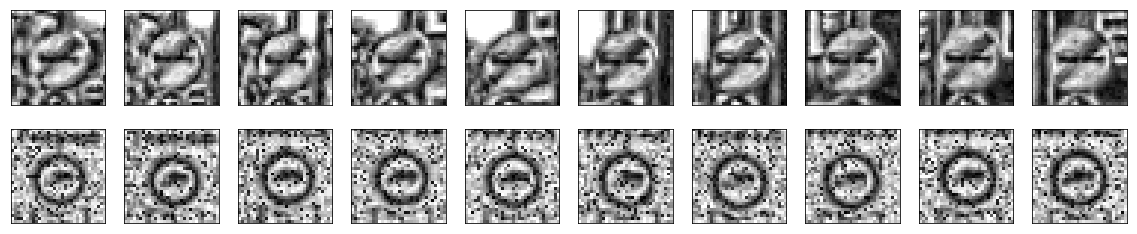

In [26]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_train[i+100].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(x_train[i+40000].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()